In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import community
%matplotlib inline

In [2]:
gg_data = pd.read_csv('adata_1jan.csv')

In [3]:
gg_data.head()

,user_id,active,friend_id,name,account_status
0,12,active,13,Ekaparnika Abbott,ghost
1,12,active,14,Ekaparnika Abbott,ghost
2,12,active,15,Bala Nair,ghost
3,12,active,16,Bala Nair,ghost
4,12,active,17,Bala Nair,ghost


In [4]:
result = gg_data.sort_values(by=['friend_id'])

In [5]:
node_list = set(gg_data['user_id'].values.tolist())

In [6]:
edge_array = gg_data[['user_id','friend_id']].values
edge_tuple = tuple(map(tuple, edge_array))

In [7]:
Graph = nx.Graph()

In [8]:
Graph.add_edges_from(edge_tuple)

In [9]:
node_attr = {}
for index, row in gg_data.iterrows():
    node_attr[row['user_id']] = {'status': row['active']}
    node_attr[row['friend_id']] = {'status': row['account_status']}

In [10]:
print nx.info(Graph)

Name: 
Type: Graph
Number of nodes: 116646
Number of edges: 122700
Average degree:   2.1038


In [11]:
remove = [node for node,degree in Graph.degree() if degree < 2]
Graph.remove_nodes_from(remove)
remove_0 = [node for node,degree in Graph.degree() if degree < 1]
Graph.remove_nodes_from(remove_0)
print nx.info(Graph)

Name: 
Type: Graph
Number of nodes: 3557
Number of edges: 9665
Average degree:   5.4344


In [28]:
nodes_to_keep = []
for node in Graph.nodes():
    if Graph.degree(node) > 600:
        nodes_to_keep.append(node)
print nodes_to_keep

[12]


In [29]:
edge_list = list(Graph.edges())
for index, val in enumerate(edge_list):
    if val[0] in nodes_to_keep:
        pass 
    else:
        del edge_list[index]

In [30]:
newGraph = nx.Graph()

In [31]:
newGraph.add_edges_from(edge_list)

In [32]:
print nx.info(newGraph)

Name: 
Type: Graph
Number of nodes: 2873
Number of edges: 5186
Average degree:   3.6102


In [33]:
nx.set_node_attributes(newGraph, node_attr)

In [34]:
active_nodes = [n for (n,s) in nx.get_node_attributes(newGraph,'status').iteritems() if s == 'active']
ghost_nodes = [n for (n,s) in  nx.get_node_attributes(newGraph,'status').iteritems() if s == 'ghost']

In [35]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(newGraph)

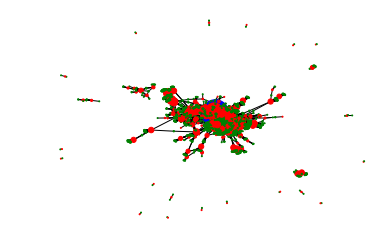

In [49]:
plt.axis("off")
d=dict(nx.degree(newGraph))
nx.draw_networkx(newGraph, pos = spring_pos, nodelist=d.keys(), node_color = ['blue' if n==12 else 'green' if newGraph.node[n]['status'] == 'ghost' else 'red' for n in d.keys()], with_labels = False, node_size=[v for v in d.values()])

In [21]:
parts = community.best_partition(newGraph)
values = [parts.get(node) for node in newGraph.nodes()]

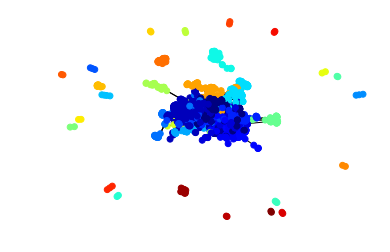

In [22]:
plt.axis("off")
nx.draw_networkx(newGraph, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)